This notebook is handeling the image learning part of our project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd
import os
!cp '/content/drive/MyDrive/ML projet/create_dataset.py' './'
!cp '/content/drive/MyDrive/ML projet/load_data.py' './'
import create_dataset
from create_dataset import * 
import load_data
from load_data import *
import matplotlib.pyplot as plt
import librosa
import librosa.display
import torch

In [ ]:
np.random.seed(42)
torch.manual_seed(0)

In [ ]:
ml_folder = Path('/content/drive/MyDrive/ML projet')
ml_folder.exists()
data_path = ml_folder/'DataLFP.mat'

In [ ]:
X_wS1, y_wS1 = preprocess_dataset(data_path, 'wS1', start=2.5, select_amplitude=[2,3])
X_mPFC, y_mPFC = preprocess_dataset(data_path, 'mPFC', start=2.5, select_amplitude=[2,3])
X_tjM1, y_tjM1 = preprocess_dataset(data_path, 'tjM1', start=2.5, select_amplitude=[2,3])

In [ ]:
def frequency_image(X):
  D = librosa.stft(X, n_fft=128, hop_length=16)  
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  librosa.display.specshow(S_db,  hop_length=16,
                         y_axis='log', sr=2000)
  
def time_image(X):
  plt.ylim([-4,4])
  plt.plot(X)

def create_fig(plot_fun, path):
  fig = plt.figure()
  plot_fun()

  fig.savefig(path)
  plt.close(fig)

def create_images(folder, X, y, plot_fun):
  folder = Path(folder)

  if not folder.exists():
    os.mkdir(folder)
  
  for i in range(len(y)):
    label = 'hit' if y[i]==1 else 'miss'
    image_path = folder/f'{label}_{i}'
    create_fig(lambda :plot_fun(X[i]), image_path)


In [ ]:
create_images(f'./wS1_time', X_wS1, y_wS1, time_image)

In [ ]:
create_images(f'./tjm1_time', X_tjM1, y_tjM1, time_image)

In [ ]:
create_images(f'./mPFC_time', X_mPFC, y_mPFC, time_image)

In [ ]:
areas = ['wS1', 'tjm1', 'mPFC']
datas = [(X_wS1, y_wS1),(X_tjM1, y_tjM1), (X_mPFC, y_mPFC)]
for area, data in zip(areas, datas):
  print(area)
  X, y = data
  create_images(f'./{area}_time', X, y, time_image)

In [ ]:
areas = ['wS1', 'tjm1', 'mPFC']
datas = [(X_wS1, y_wS1),(X_tjM1, y_tjM1), (X_mPFC, y_mPFC)]
for area, data in zip(areas, datas):
  print(area)
  X, y = data
  create_images(f'./{area}_frequency', X, y, frequency_image)

In [ ]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 189 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 


In [ ]:
import fastai
from fastai.vision.all import *

In [ ]:
def label_func(f): return f.split('_')[0]

1808


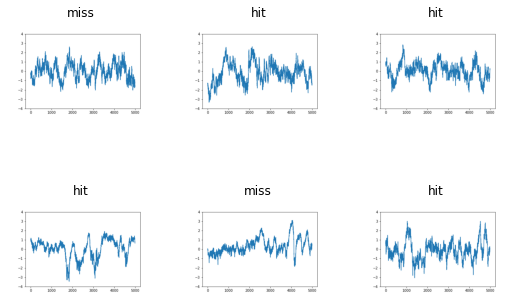

In [ ]:
wS1 = Path('./wS1_time')
files = get_image_files(wS1)
print(len(files))
dls = ImageDataLoaders.from_name_func(wS1, files, label_func)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(15, freeze_epochs=2, base_lr=2e-4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.337856,1.189596,0.518006,00:36
1,1.274598,0.869674,0.520776,00:30


epoch,train_loss,valid_loss,accuracy,time
0,1.135961,0.885603,0.529086,00:42
1,1.109032,0.878645,0.526316,00:40
2,1.054625,0.885314,0.506925,00:40
3,0.978305,0.910246,0.512465,00:40
4,0.915187,0.889004,0.534626,00:40
5,0.808692,0.930643,0.512465,00:40
6,0.741889,0.914235,0.526316,00:40
7,0.665501,0.945899,0.487535,00:40
8,0.592448,0.934450,0.520776,00:40
9,0.522884,0.922781,0.523546,00:40


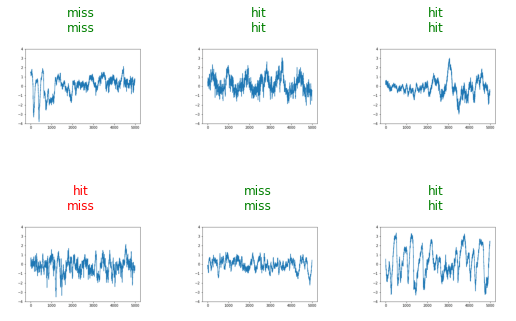

In [ ]:
learn.show_results(max_n=6)

582


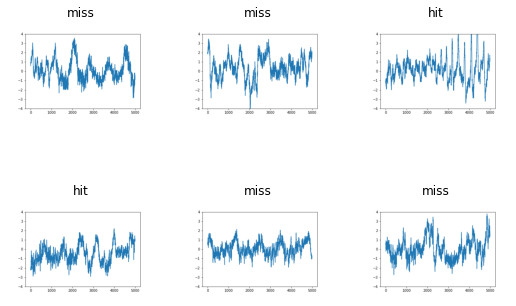

In [ ]:
tjm1 = Path('./tjm1_time')
files = get_image_files(tjm1)
print(len(files))
dls = ImageDataLoaders.from_name_func(tjm1, files, label_func)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(15, freeze_epochs=4, base_lr=2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.361983,0.775807,0.603448,00:10
1,1.405129,1.023371,0.577586,00:10
2,1.358786,0.920205,0.594828,00:10
3,1.295952,0.811215,0.568965,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.093975,0.812480,0.612069,00:13
1,1.068907,0.798359,0.586207,00:13
2,1.006614,0.821399,0.586207,00:13
3,0.967159,0.818748,0.620690,00:14
4,0.888836,0.826142,0.603448,00:13
5,0.792442,0.846597,0.577586,00:14
6,0.717500,0.835849,0.577586,00:14
7,0.665108,0.820125,0.637931,00:14
8,0.610566,0.845622,0.594828,00:14
9,0.557561,0.854408,0.620690,00:14


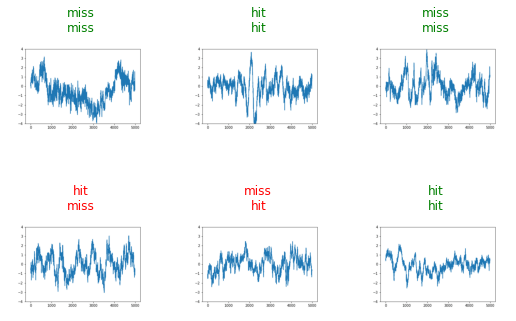

In [ ]:
learn.show_results(max_n=6)

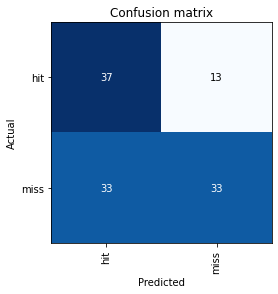

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

1292


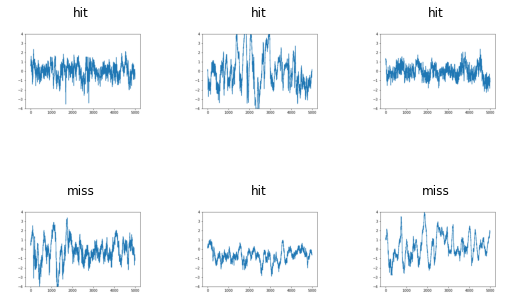

In [ ]:
mPFC = Path('./mPFC_time')
files = get_image_files(mPFC)
print(len(files))
dls = ImageDataLoaders.from_name_func(mPFC, files, label_func)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(14, freeze_epochs=4, base_lr=2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.471187,0.966645,0.500000,00:23
1,1.365332,0.864887,0.515504,00:22
2,1.288245,0.899103,0.507752,00:23
3,1.248758,0.891235,0.484496,00:22


epoch,train_loss,valid_loss,accuracy,time
0,1.015049,0.908884,0.507752,00:30
1,0.993284,0.915677,0.503876,00:29
2,0.930169,0.899739,0.496124,00:30
3,0.879476,0.887787,0.519380,00:30
4,0.824372,0.908006,0.519380,00:29
5,0.754191,0.951969,0.519380,00:30
6,0.672748,0.938033,0.531008,00:29
7,0.597388,0.974939,0.523256,00:29
8,0.543799,0.983359,0.496124,00:30
9,0.480283,0.974635,0.507752,00:30


1808


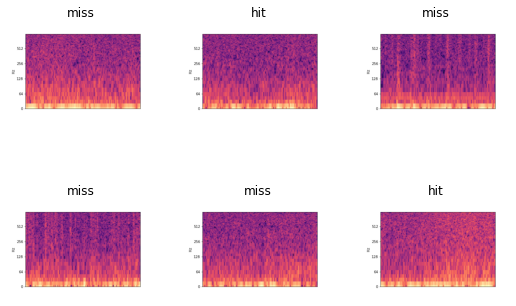

In [ ]:
wS1 = Path('./wS1_frequency')
files = get_image_files(wS1)
print(len(files))
dls = ImageDataLoaders.from_name_func(wS1, files, label_func)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(15, freeze_epochs=2, base_lr=2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.278886,0.890492,0.468144,00:33
1,1.300388,0.896339,0.493075,00:30


epoch,train_loss,valid_loss,accuracy,time
0,1.169534,0.904669,0.468144,00:42
1,1.098175,0.901634,0.459834,00:40
2,1.038902,0.909874,0.473684,00:40
3,0.958103,0.919356,0.479224,00:40
4,0.873879,0.971838,0.479224,00:40
5,0.787343,0.973261,0.476454,00:41
6,0.692755,0.952280,0.493075,00:41
7,0.618371,0.984688,0.476454,00:40
8,0.564187,0.997283,0.490305,00:40
9,0.496532,1.008198,0.506925,00:41


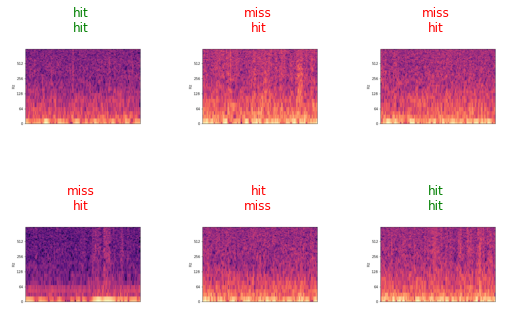

In [ ]:
learn.show_results(max_n=6)

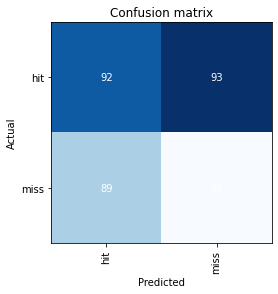

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

582


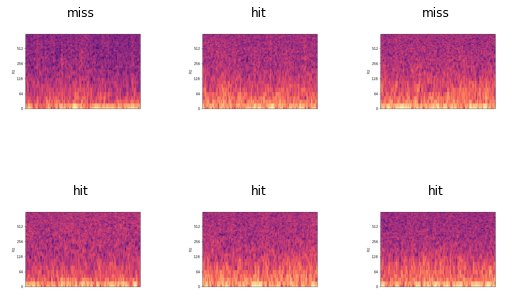

In [ ]:
tjm1 = Path('./tjm1_frequency')
files = get_image_files(tjm1)
print(len(files))
dls = ImageDataLoaders.from_name_func(tjm1, files, label_func)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(15, freeze_epochs=3, base_lr=2e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.299117,1.163731,0.517241,00:10
1,1.329217,0.831651,0.517241,00:10
2,1.274889,0.881932,0.491379,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.195201,0.943187,0.525862,00:14
1,1.136753,0.914187,0.500000,00:13
2,1.059298,0.927003,0.500000,00:13
3,1.025834,0.910020,0.474138,00:13
4,0.914506,0.876599,0.517241,00:13
5,0.840834,0.944669,0.474138,00:13
6,0.769795,0.922974,0.508621,00:13
7,0.699322,0.939866,0.482759,00:14
8,0.630062,0.938813,0.508621,00:13
9,0.576651,0.957380,0.491379,00:13


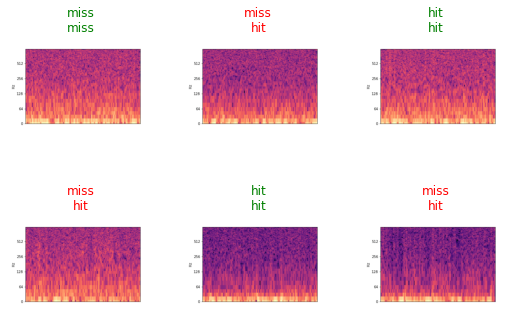

In [ ]:
learn.show_results(max_n=6)

1292


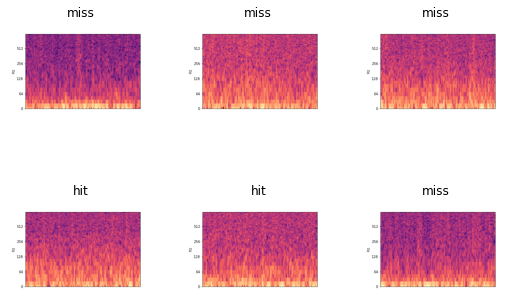

In [ ]:
mpfc = Path('./mPFC_frequency')
files = get_image_files(mpfc)
print(len(files))
dls = ImageDataLoaders.from_name_func(mpfc, files, label_func)
dls.show_batch(max_n=6)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10, freeze_epochs=2, base_lr=2e-4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.419579,0.846567,0.519380,00:28
1,1.370292,0.851843,0.527132,00:22


epoch,train_loss,valid_loss,accuracy,time
0,1.153190,0.865659,0.523256,00:31
1,1.101256,0.858622,0.538760,00:30
2,1.032943,0.856607,0.542636,00:29
3,0.937990,0.915886,0.500000,00:30
4,0.851731,0.941813,0.500000,00:30
5,0.786885,0.899874,0.527132,00:30
6,0.724248,0.924740,0.496124,00:30
7,0.663041,0.940351,0.496124,00:29
8,0.614097,0.934171,0.507752,00:29
9,0.574434,0.937203,0.496124,00:30


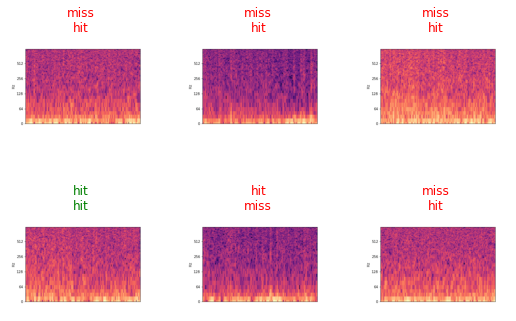

In [ ]:
learn.show_results(max_n=6)